This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


2022-10-06 10:39:05.211552: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.56897026]
 [ 0.44651768]
 [-0.4776512 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.58069694]
 [0.28919518]
 [0.39867938]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.5447044 ],
       [-0.81125265],
       [-0.20945856]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [36]:
num_samples_per_class = 1200
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [37]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [38]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

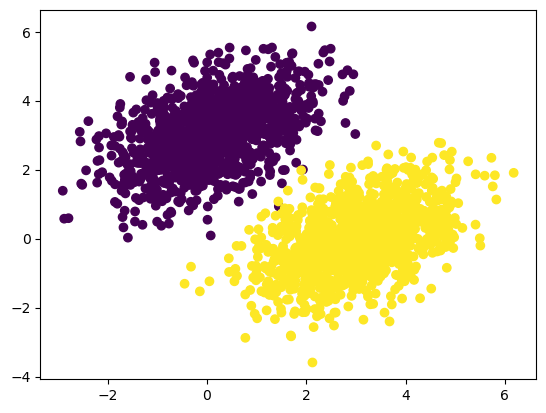

In [39]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [40]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [41]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [42]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [43]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [44]:
for step in range(50):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.1380
Loss at step 1: 0.0823
Loss at step 2: 0.0773
Loss at step 3: 0.0731
Loss at step 4: 0.0692
Loss at step 5: 0.0657
Loss at step 6: 0.0624
Loss at step 7: 0.0594
Loss at step 8: 0.0567
Loss at step 9: 0.0542
Loss at step 10: 0.0518
Loss at step 11: 0.0497
Loss at step 12: 0.0477
Loss at step 13: 0.0459
Loss at step 14: 0.0443
Loss at step 15: 0.0427
Loss at step 16: 0.0413
Loss at step 17: 0.0400
Loss at step 18: 0.0388
Loss at step 19: 0.0378
Loss at step 20: 0.0367
Loss at step 21: 0.0358
Loss at step 22: 0.0350
Loss at step 23: 0.0342
Loss at step 24: 0.0335
Loss at step 25: 0.0328
Loss at step 26: 0.0322
Loss at step 27: 0.0317
Loss at step 28: 0.0311
Loss at step 29: 0.0307
Loss at step 30: 0.0302
Loss at step 31: 0.0298
Loss at step 32: 0.0295
Loss at step 33: 0.0291
Loss at step 34: 0.0288
Loss at step 35: 0.0285
Loss at step 36: 0.0283
Loss at step 37: 0.0280
Loss at step 38: 0.0278
Loss at step 39: 0.0276
Loss at step 40: 0.0274
Loss at step 41: 0.0273
Lo

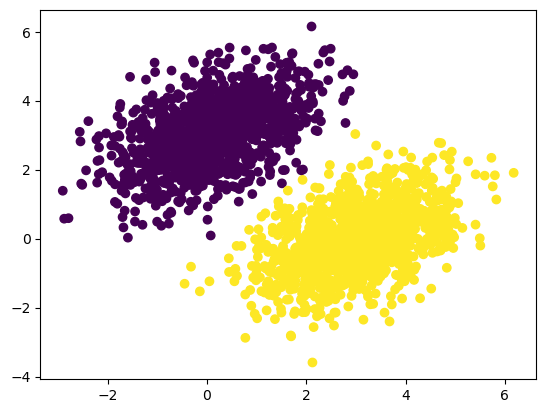

In [45]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

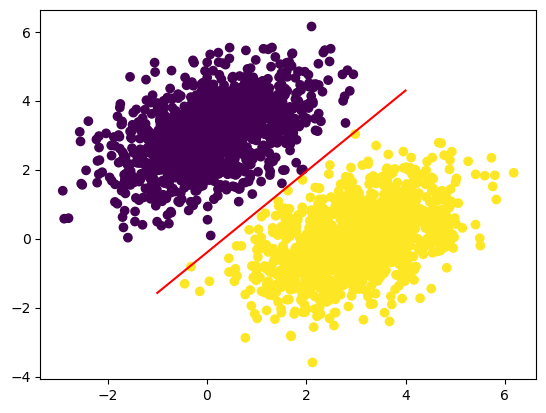

In [46]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [47]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [48]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [49]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [51]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [52]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [53]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [54]:
history = model.fit(
    inputs,
    targets,
    epochs=10,
    batch_size=128
)

Epoch 1/10
19/19 [==============================] - 0s 2ms/step - loss: 5.5480 - binary_accuracy: 0.0154
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 5.2354 - binary_accuracy: 0.0158
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 4.9648 - binary_accuracy: 0.0188
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 4.7042 - binary_accuracy: 0.0196
Epoch 5/10
19/19 [==============================] - 0s 1ms/step - loss: 4.4524 - binary_accuracy: 0.0213
Epoch 6/10
19/19 [==============================] - 0s 1ms/step - loss: 4.2105 - binary_accuracy: 0.0225
Epoch 7/10
19/19 [==============================] - 0s 1ms/step - loss: 3.9752 - binary_accuracy: 0.0242
Epoch 8/10
19/19 [==============================] - 0s 1ms/step - loss: 3.7470 - binary_accuracy: 0.0258
Epoch 9/10
19/19 [==============================] - 0s 1ms/step - loss: 3.5262 - binary_accuracy: 0.0283
Epoch 10/10
19/19 [==============================] - 0s

In [55]:
history.history

{'loss': [5.547952651977539,
  5.23537540435791,
  4.964795112609863,
  4.704222679138184,
  4.452415943145752,
  4.210458755493164,
  3.975209951400757,
  3.7469539642333984,
  3.5261824131011963,
  3.3117733001708984],
 'binary_accuracy': [0.015416666865348816,
  0.015833333134651184,
  0.01875000074505806,
  0.019583333283662796,
  0.021250000223517418,
  0.02250000089406967,
  0.024166665971279144,
  0.025833332911133766,
  0.028333334252238274,
  0.03125]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [56]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
105/105 [==============================] - 1s 2ms/step - loss: 0.4038 - binary_accuracy: 0.8976 - val_loss: 0.0257 - val_binary_accuracy: 1.0000
Epoch 2/5
105/105 [==============================] - 0s 1ms/step - loss: 0.0709 - binary_accuracy: 0.9589 - val_loss: 0.0259 - val_binary_accuracy: 1.0000
Epoch 3/5
105/105 [==============================] - 0s 1ms/step - loss: 0.0758 - binary_accuracy: 0.9500 - val_loss: 0.0621 - val_binary_accuracy: 0.9611
Epoch 4/5
105/105 [==============================] - 0s 1ms/step - loss: 0.0713 - binary_accuracy: 0.9548 - val_loss: 0.0348 - val_binary_accuracy: 1.0000
Epoch 5/5
105/105 [==============================] - 0s 1ms/step - loss: 0.0743 - binary_accuracy: 0.9589 - val_loss: 0.0299 - val_binary_accuracy: 1.0000


### Inference: Using a model after training

In [57]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

6/6 [==============================] - 0s 2ms/step
[[ 0.85608435]
 [ 1.0285707 ]
 [-0.09601134]
 [ 0.98303854]
 [ 1.0738416 ]
 [ 0.90957534]
 [ 0.04754442]
 [ 0.90086615]
 [ 0.1995202 ]
 [ 0.21191126]]


## Summary